In [51]:
import pandas as pd
import numpy as np
import sklearn
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [52]:
data = pd.read_csv("DATA_EDA.csv")

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
df = data.select_dtypes(include = ['float64', 'int64'])
df.head()

,POP_CODE,DOC_DATE_YEAR,DOC_DATE_MONTH_YR,DOC_DATE_WEEK_YR,ORDER_STATUS,TOWN_CODE,LOCALITY_CODE,SLOCALITY_CODE,POS_TYPE_CODE,COMPANY_RANK,RANK,SHOPPER_TYPE_CODE,SUB_ELEMENT_CODE,CHANNEL_CODE,SUB_CHANNEL_CODE,ELEMENT_CODE,MARKET_CODE,STREET_CODE,OWNER_CODE,RURAL_CODE,DOC_DATE_QUARTER_YR,DOC_DATE_DAYS_MNTH,DOC_DATE_WEEK_MNTH
0,1,2014,2,8,0,6,3,20,8,3,5,2,8,1,2,7,622,322,464,1,1,28,4
1,1,2014,3,10,0,6,3,20,8,3,5,2,8,1,2,7,622,322,464,1,1,31,1
2,1,2014,3,11,1,6,3,20,8,3,5,2,8,1,2,7,622,322,464,1,1,31,2
3,1,2014,3,12,1,6,3,20,8,3,5,2,8,1,2,7,622,322,464,1,1,31,3
4,1,2014,3,13,0,6,3,20,8,3,5,2,8,1,2,7,622,322,464,1,1,31,4


In [103]:
dat = df.ORDER_STATUS
x= df.values

In [104]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,dat, random_state=0)

In [105]:
x_test.shape

(90309, 23)

In [106]:
x_train.shape

(30103, 23)

In [107]:
y_train.shape

(30103,)

In [108]:
y_test.shape

(90309,)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [111]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [113]:
print("predictions: {}".format(clf.predict(x_test)))

predictions: [0 1 1 ..., 1 1 0]


In [114]:
print("Test set accuracy: {:.2f}".format(clf.score(x_test, y_test)))

Test set accuracy: 0.63


In [128]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.88


In [129]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.880


In [139]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.880


In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    x, dat, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.920


In [132]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    x, dat, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.840


In [133]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.840


In [134]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.840


In [135]:
x = df.values

In [136]:
from sklearn.datasets import make_blobs
# create a synthetic dataset
x, dat = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(x, dat, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


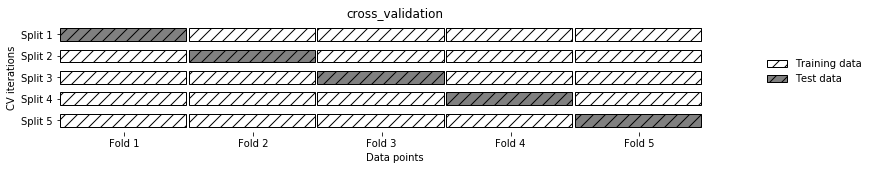

In [137]:
mglearn.plots.plot_cross_validation()

LR: 0.908929 (0.082007)
LDA: 0.921429 (0.085341)
KNN: 0.946429 (0.065854)
CART: 0.935714 (0.064484)
NB: 0.896429 (0.094761)
SVM: 0.933929 (0.066360)


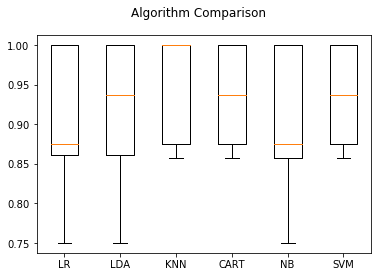

In [126]:
X = X_train
Y = y_train
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.783333 (0.269258)
LDA: 0.866667 (0.208167)
KNN: 0.816667 (0.320156)
CART: 0.916667 (0.170783)
NB: 0.833333 (0.258199)
SVM: 0.766667 (0.290593)


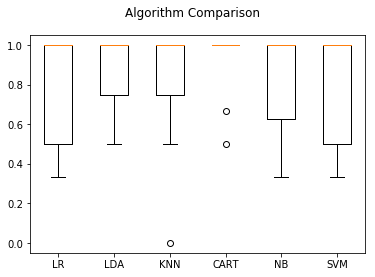

In [127]:

X = X_test
Y = y_test
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()